In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='whitegrid')
clicks = pd.read_csv("/home/fedoremelianenko/FIUBA/Organizacion de datos/TP1/data/clicks.csv",
                     usecols = ['advertiser_id', 'created', 'ref_type'])
clicks['created'] = pd.to_datetime(clicks['created'])
clicks['Hora'] = clicks['created'].apply(lambda x: x.hour)
clicks['Dia'] = clicks['created'].apply(lambda x: x.weekday)
clicks['suma'] = 1
clicks.head()

,advertiser_id,created,ref_type,Hora,Dia,suma
0,2,2019-03-06 22:42:12.755000+00:00,1891515180541284343,22,2,1
1,0,2019-03-08 10:24:30.641000+00:00,1891515180541284343,10,4,1
2,0,2019-03-08 15:24:16.069000+00:00,1891515180541284343,15,4,1
3,2,2019-03-06 03:08:51.543000+00:00,1891515180541284343,3,2,1
4,2,2019-03-06 03:32:55.570000+00:00,1891515180541284343,3,2,1


In [19]:
clicks_id_hora = clicks.groupby(['advertiser_id','Hora']).agg({'suma':'sum'})
clicks_id_hora.reset_index(inplace=True)
clicks_id_dia = clicks.groupby(['advertiser_id','Dia']).agg({'suma':'sum'})
clicks_id_dia.reset_index(inplace=True)

Text(0,0.5,'Clicks por hora')

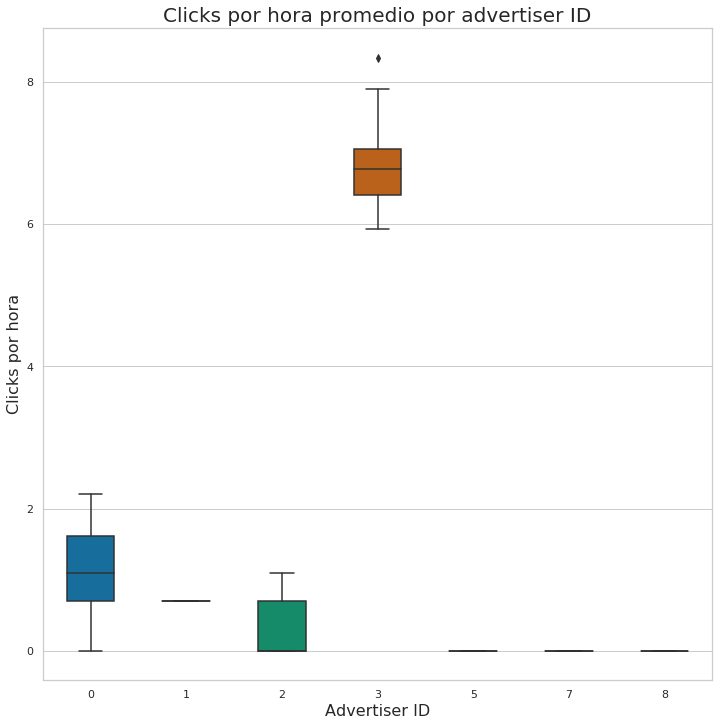

In [20]:
plt.figure(figsize=(12,12))
clicks_id_hora['suma_log'] = np.log(clicks_id_hora['suma'])
boxplot_clicks_por_hora = sns.boxplot(y='suma_log', x='advertiser_id',palette='colorblind',width=0.5,data=clicks_id_hora)
boxplot_clicks_por_hora.set_title('Clicks por hora promedio por advertiser ID',fontsize=20)
boxplot_clicks_por_hora.set_xlabel('Advertiser ID',fontsize=16)
boxplot_clicks_por_hora.set_ylabel('Clicks por hora',fontsize=16)

Text(0,0.5,'Clicks por dia')

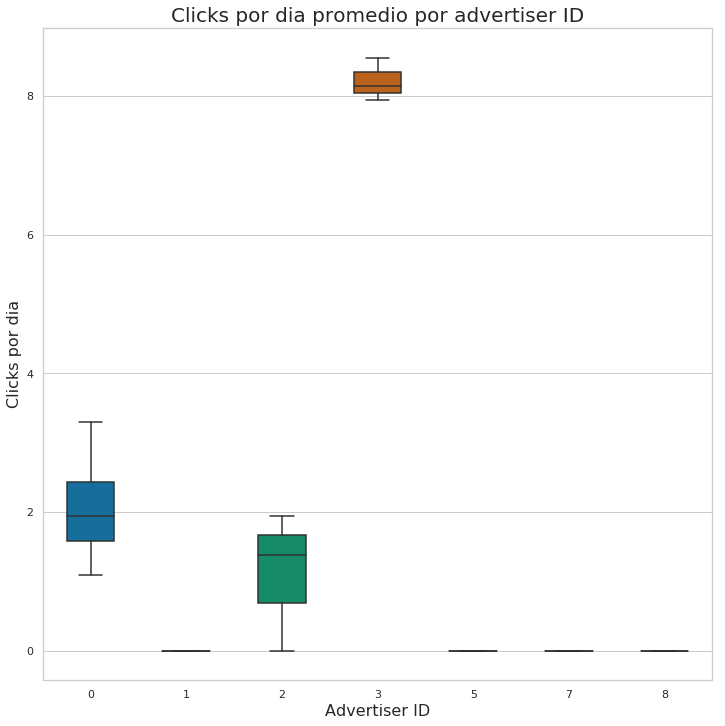

In [21]:
plt.figure(figsize=(12,12))
clicks_id_dia['suma_log'] = np.log(clicks_id_dia['suma'])
boxplot_clicks_por_dia = sns.boxplot(y='suma_log', x='advertiser_id',palette='colorblind',width=0.5,data=clicks_id_dia)
boxplot_clicks_por_dia.set_title('Clicks por dia promedio por advertiser ID',fontsize=20)
boxplot_clicks_por_dia.set_xlabel('Advertiser ID',fontsize=16)
boxplot_clicks_por_dia.set_ylabel('Clicks por dia',fontsize=16)